In [68]:
train_data_url = "datasets/Data_Train.xlsx"
test_data_url = "datasets/Test_set.xlsx"

import numpy as np
import pandas as pd
import seaborn as sns

df = pd.read_excel(train_data_url)
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


<AxesSubplot:xlabel='Price', ylabel='Count'>

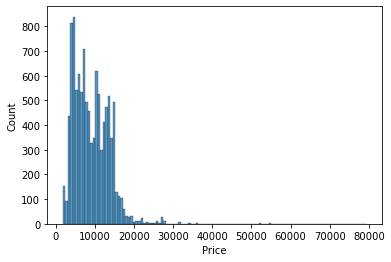

In [6]:
sns.histplot(df.Price)

In [9]:
df['Duration'].value_counts()

2h 50m     550
1h 30m     386
2h 45m     337
2h 55m     337
2h 35m     329
          ... 
42h 5m       1
30h 15m      1
47h 40m      1
37h 10m      1
32h 20m      1
Name: Duration, Length: 368, dtype: int64

In [11]:
df.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [14]:
df.dropna(inplace = True)
df.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

In [ ]:
#Bring the month in category column and use one hot for create the features
#import calendar
#df['Month'] = df['Month'].apply(lambda x: calendar.month_abbr[x])

In [69]:
df["Journey_day"] = pd.to_datetime(df.Date_of_Journey, format="%d/%m/%Y").dt.day
df["Journey_month"] = pd.to_datetime(df.Date_of_Journey, format="%d/%m/%Y").dt.month

df["Dep_hours"] = pd.to_datetime(df.Dep_Time).dt.hour
df["Dep_min"] = pd.to_datetime(df.Dep_Time).dt.minute

df["Arrival_hours"] = pd.to_datetime(df.Arrival_Time).dt.hour
df['Arrival_min'] = pd.to_datetime(df.Arrival_Time).dt.minute

In [70]:
df.drop(['Date_of_Journey','Dep_Time','Arrival_Time'], axis=1)
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Dep_hours,Dep_min,Arrival_hours,Arrival_min
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,22,20,1,10
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5,5,50,13,15
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,6,9,25,4,25
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,5,18,5,23,30
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,1,3,16,50,21,35


In [71]:
duration = list(df['Duration'])

for i in range(len(duration)):
    if len(duration[i].split()) != 2:
        if 'h' in duration[i]:
            duration[i] = duration[i].strip() + " 0m"
        else:
            duration[i] = "0h " + duration[i]

duration_hours = []
duration_minute = []
for i in range(len(duration)):
    duration_hours.append(int(duration[i].split("h")[0]))
    duration_minute.append(int(duration[i].split("m")[0].split()[-1]))
    
df["Duration_hours"] = duration_hours
df["Duration_mins"] = duration_minute

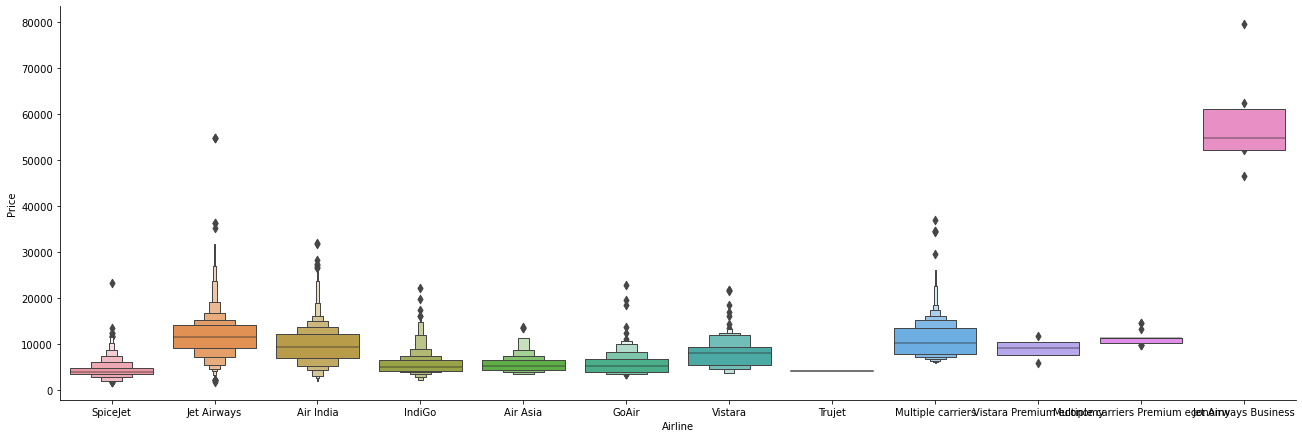

In [54]:
import matplotlib.pyplot as plt
sns.catplot(x='Airline',y='Price', data=df.sort_values("Price"),kind="boxen", height = 6, aspect = 3)
plt.show()

In [73]:
airline_dummies = pd.get_dummies(df['Airline'])
airline_dummies.head()

,Air Asia,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,Vistara Premium economy
0,0,0,0,1,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,1,0,0,0,0,0,0,0
3,0,0,0,1,0,0,0,0,0,0,0,0
4,0,0,0,1,0,0,0,0,0,0,0,0


In [74]:
source = pd.get_dummies(df['Source'])
destination = pd.get_dummies(df['Destination'])

,Banglore,Chennai,Delhi,Kolkata,Mumbai
0,1,0,0,0,0
1,0,0,0,1,0
2,0,0,1,0,0
3,0,0,0,1,0
4,1,0,0,0,0


In [58]:
df['Total_Stops'].value_counts()

1 stop      5625
non-stop    3491
2 stops     1520
3 stops       45
4 stops        1
Name: Total_Stops, dtype: int64

In [76]:
df['Total_Stops'].replace({"non-stop": 0, "1 stop": 1, "2 stops": 2, "3 stops": 3, "4 stops": 4}, inplace = True)
df.drop(['Date_of_Journey','Source','Destination','Route','Dep_Time','Arrival_Time','Duration','Additional_Info'], axis=1, inplace=True)
df.head()

,Airline,Total_Stops,Price,Journey_day,Journey_month,Dep_hours,Dep_min,Arrival_hours,Arrival_min,Duration_hours,Duration_mins
0,IndiGo,0.0,3897,24,3,22,20,1,10,2,50
1,Air India,2.0,7662,1,5,5,50,13,15,7,25
2,Jet Airways,2.0,13882,9,6,9,25,4,25,19,0
3,IndiGo,1.0,6218,12,5,18,5,23,30,5,25
4,IndiGo,1.0,13302,1,3,16,50,21,35,4,45


In [78]:
df_train = pd.concat([df,source,destination,airline_dummies], axis=1)
df_train.head()

,Airline,Total_Stops,Price,Journey_day,Journey_month,Dep_hours,Dep_min,Arrival_hours,Arrival_min,Duration_hours,...,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,Vistara Premium economy
0,IndiGo,0.0,3897,24,3,22,20,1,10,2,...,0,1,0,0,0,0,0,0,0,0
1,Air India,2.0,7662,1,5,5,50,13,15,7,...,0,0,0,0,0,0,0,0,0,0
2,Jet Airways,2.0,13882,9,6,9,25,4,25,19,...,0,0,1,0,0,0,0,0,0,0
3,IndiGo,1.0,6218,12,5,18,5,23,30,5,...,0,1,0,0,0,0,0,0,0,0
4,IndiGo,1.0,13302,1,3,16,50,21,35,4,...,0,1,0,0,0,0,0,0,0,0


In [117]:
#--------- Feature Engg for test data------:
df = pd.read_excel(test_data_url)

df["Journey_day"] = pd.to_datetime(df.Date_of_Journey, format="%d/%m/%Y").dt.day
df["Journey_month"] = pd.to_datetime(df.Date_of_Journey, format="%d/%m/%Y").dt.month

df["Dep_hours"] = pd.to_datetime(df.Dep_Time).dt.hour
df["Dep_min"] = pd.to_datetime(df.Dep_Time).dt.minute

df["Arrival_hours"] = pd.to_datetime(df.Arrival_Time).dt.hour
df['Arrival_min'] = pd.to_datetime(df.Arrival_Time).dt.minute

df.drop(['Date_of_Journey','Dep_Time','Arrival_Time'], axis=1)

duration = list(df['Duration'])

for i in range(len(duration)):
    if len(duration[i].split()) != 2:
        if 'h' in duration[i]:
            duration[i] = duration[i].strip() + " 0m"
        else:
            duration[i] = "0h " + duration[i]

duration_hours = []
duration_minute = []
for i in range(len(duration)):
    duration_hours.append(int(duration[i].split("h")[0]))
    duration_minute.append(int(duration[i].split("m")[0].split()[-1]))
    
df["Duration_hours"] = duration_hours
df["Duration_mins"] = duration_minute

airline_dummies = pd.get_dummies(df['Airline'])
source = pd.get_dummies(df['Source'])
destination = pd.get_dummies(df['Destination'])

df['Total_Stops'].replace({"non-stop": 0, "1 stop": 1, "2 stops": 2, "3 stops": 3, "4 stops": 4}, inplace = True)
df.drop(['Date_of_Journey','Source','Destination','Route','Dep_Time','Arrival_Time','Duration','Additional_Info'], axis=1, inplace=True)

df_test = pd.concat([df,source,destination,airline_dummies], axis=1)
df_test.head()

,Airline,Total_Stops,Journey_day,Journey_month,Dep_hours,Dep_min,Arrival_hours,Arrival_min,Duration_hours,Duration_mins,...,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Vistara,Vistara Premium economy
0,Jet Airways,1,6,6,17,30,4,25,10,55,...,0,0,0,1,0,0,0,0,0,0
1,IndiGo,1,12,5,6,20,10,20,4,0,...,0,0,1,0,0,0,0,0,0,0
2,Jet Airways,1,21,5,19,15,19,0,23,45,...,0,0,0,1,0,0,0,0,0,0
3,Multiple carriers,1,21,5,8,0,21,0,13,0,...,0,0,0,0,0,1,0,0,0,0
4,Air Asia,0,24,6,23,55,2,45,2,50,...,0,0,0,0,0,0,0,0,0,0


In [94]:
df_train.dropna(inplace=True)

In [80]:
df_train.columns

Index(['Airline', 'Total_Stops', 'Price', 'Journey_day', 'Journey_month',
       'Dep_hours', 'Dep_min', 'Arrival_hours', 'Arrival_min',
       'Duration_hours', 'Duration_mins', 'Banglore', 'Chennai', 'Delhi',
       'Kolkata', 'Mumbai', 'Banglore', 'Cochin', 'Delhi', 'Hyderabad',
       'Kolkata', 'New Delhi', 'Air Asia', 'Air India', 'GoAir', 'IndiGo',
       'Jet Airways', 'Jet Airways Business', 'Multiple carriers',
       'Multiple carriers Premium economy', 'SpiceJet', 'Trujet', 'Vistara',
       'Vistara Premium economy'],
      dtype='object')

In [109]:
X = df_train[['Total_Stops','Journey_day', 'Journey_month',
       'Dep_hours', 'Dep_min', 'Arrival_hours', 'Arrival_min',
       'Duration_hours', 'Duration_mins', 'Banglore', 'Chennai', 'Delhi',
       'Kolkata', 'Mumbai', 'Banglore', 'Cochin', 'Delhi', 'Hyderabad',
       'Kolkata', 'New Delhi', 'Air Asia', 'Air India', 'GoAir', 'IndiGo',
       'Jet Airways', 'Jet Airways Business', 'Multiple carriers',
       'Multiple carriers Premium economy', 'SpiceJet', 'Trujet', 'Vistara',
       'Vistara Premium economy']]

X.head()

,Total_Stops,Journey_day,Journey_month,Dep_hours,Dep_min,Arrival_hours,Arrival_min,Duration_hours,Duration_mins,Banglore,...,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,Vistara Premium economy
0,0.0,24,3,22,20,1,10,2,50,1,...,0,1,0,0,0,0,0,0,0,0
1,2.0,1,5,5,50,13,15,7,25,0,...,0,0,0,0,0,0,0,0,0,0
2,2.0,9,6,9,25,4,25,19,0,0,...,0,0,1,0,0,0,0,0,0,0
3,1.0,12,5,18,5,23,30,5,25,0,...,0,1,0,0,0,0,0,0,0,0
4,1.0,1,3,16,50,21,35,4,45,1,...,0,1,0,0,0,0,0,0,0,0


In [96]:
y = df_train['Price']
y.head()

0     3897
1     7662
2    13882
3     6218
4    13302
Name: Price, dtype: int64

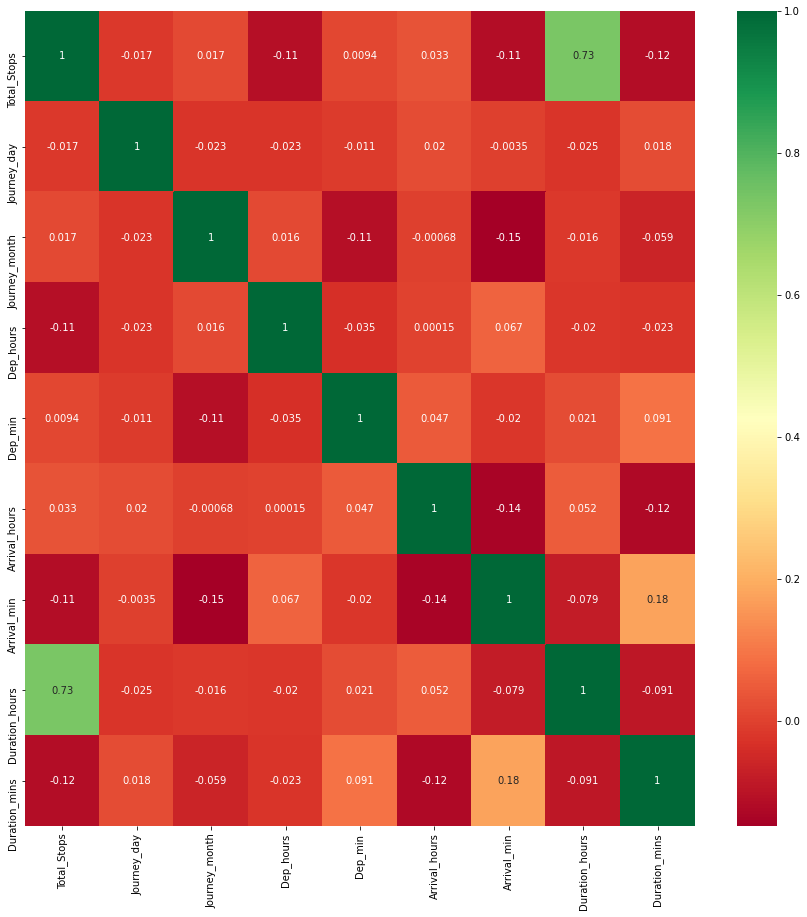

In [119]:
# Finds correlation between Independent and dependent attributes

plt.figure(figsize = (15,15))
sns.heatmap(df.corr(), annot = True, cmap = "RdYlGn")

plt.show()

In [111]:
# Important feature using ExtraTreesRegressor

from sklearn.ensemble import ExtraTreesRegressor
selection = ExtraTreesRegressor()
selection.fit(X, y)
print(selection.feature_importances_)

[2.35208332e-01 1.44534463e-01 5.28842738e-02 2.41980402e-02
 2.05172785e-02 2.69965466e-02 1.94735171e-02 1.15908463e-01
 1.75742225e-02 5.87358385e-03 1.17060082e-03 3.37133531e-04
 9.42390486e-03 5.98878703e-03 1.05456364e-03 3.90292283e-04
 7.93014204e-03 6.00910888e-03 1.12334905e-03 4.29175207e-03
 7.00644422e-03 9.88153749e-03 7.72661929e-03 1.12135212e-03
 2.54875023e-04 1.34779240e-02 1.85119102e-03 9.70265805e-03
 1.61495320e-03 1.77893570e-02 1.34319326e-01 6.75443116e-02
 1.80022957e-02 8.10444110e-04 2.96962785e-03 9.67659013e-05
 4.86517698e-03 7.67849759e-05]


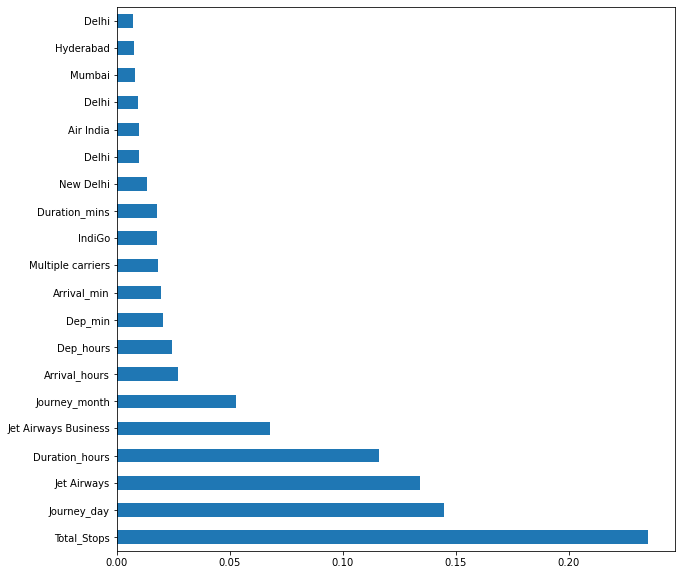

In [112]:
plt.figure(figsize=(10,10))
best_feature = pd.Series(selection.feature_importances_,index = X.columns)
best_feature.sort_values().nlargest(20).plot(kind='barh')
plt.show()

### Fitting model using Random Forest
>Split dataset into train and test set in order to prediction w.r.t X_test
>If needed do scaling of data
    Scaling is not done in Random forest
>Import model
>Fit the data
>Predict w.r.t X_test
>In regression check RSME Score
>Plot graph

In [121]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [122]:
from sklearn.ensemble import RandomForestRegressor
reg_rf = RandomForestRegressor()
reg_rf.fit(X_train, y_train)

RandomForestRegressor()

In [123]:
y_pred = reg_rf.predict(X_test)
reg_rf.score(X_train, y_train)

0.952973663261467

In [124]:
reg_rf.score(X_test, y_test)

0.7985720821736211

C:\Users\sjain191\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


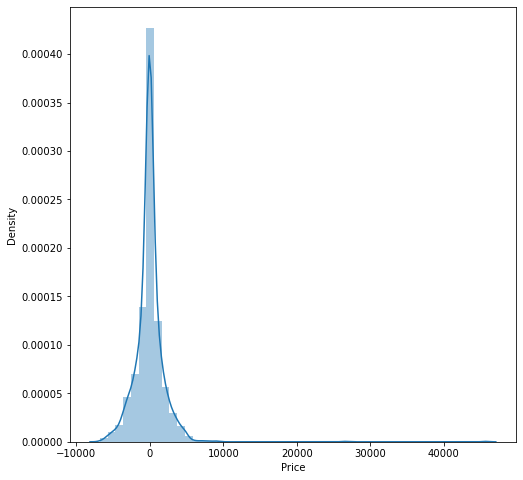

In [135]:
plt.figure(figsize = (8,8))
sns.distplot(y_test-y_pred)
plt.show()

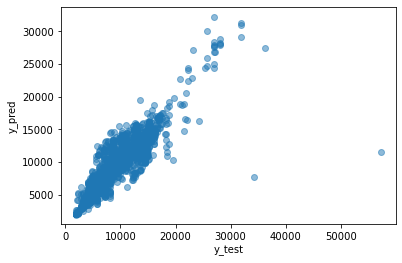

In [126]:
plt.scatter(y_test, y_pred, alpha = 0.5)
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.show()

In [127]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

MAE: 1179.1891447852245
MSE: 4343200.109431013
RMSE: 2084.0345749125695


In [128]:
# RMSE/(max(DV)-min(DV))

2090.5509/(max(y)-min(y))

0.026887077025966846

In [129]:
metrics.r2_score(y_test, y_pred)

0.7985720821736211

### Hyperparameter Tuning
>Choose following method for hyperparameter tuning
    1.RandomizedSearchCV --> Fast
    2.GridSearchCV
>Assign hyperparameters in form of dictionery
>Fit the model
>Check best paramters and best score

In [130]:
from sklearn.model_selection import RandomizedSearchCV

In [131]:
#Randomized Search CV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 15, 100]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 5, 10]

# Create the random grid

random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

In [132]:

# Random search of parameters, using 5 fold cross validation, 
# search across 100 different combinations
rf_random = RandomizedSearchCV(estimator = reg_rf, param_distributions = random_grid,scoring='neg_mean_squared_error', n_iter = 10, cv = 5, verbose=2, random_state=42, n_jobs = 1)
rf_random.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   6.4s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    6.3s remaining:    0.0s


[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   6.6s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 
[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   6.3s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 
[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   8.9s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 
[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   7.8s
[CV] n_estimators=1100, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=15 
[CV]  n_estimators=1100, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=15, total=  10.3s
[CV] n_estimators=1100, min_samples_split=10, mi

[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   3.6s
[CV] n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5 
[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   4.0s
[CV] n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5 
[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   3.4s
[CV] n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5 
[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   3.8s
[CV] n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5 
[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   3.0s
[CV] n_estimators=700, min_samples_split=15, min_sam

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:  8.3min finished


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [133]:
rf_random.best_params_

{'n_estimators': 700,
 'min_samples_split': 15,
 'min_samples_leaf': 1,
 'max_features': 'auto',
 'max_depth': 20}

C:\Users\sjain191\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


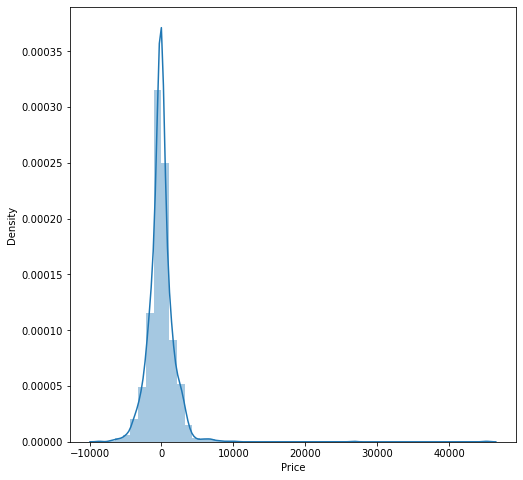

In [134]:
prediction = rf_random.predict(X_test)

plt.figure(figsize = (8,8))
sns.distplot(y_test-prediction)
plt.show()

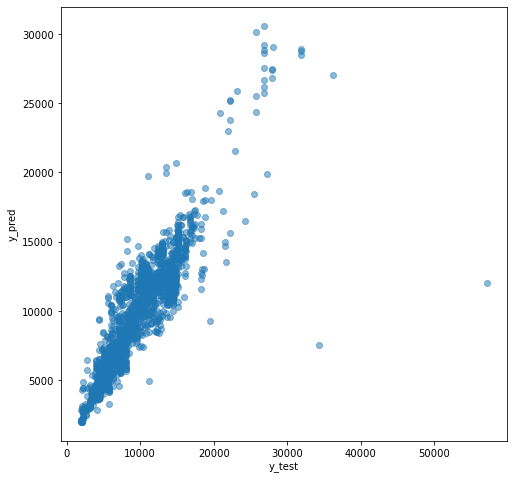

In [137]:
plt.figure(figsize = (8,8))
plt.scatter(y_test, prediction, alpha = 0.5)
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.show()

In [136]:
print('MAE:', metrics.mean_absolute_error(y_test, prediction))
print('MSE:', metrics.mean_squared_error(y_test, prediction))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, prediction)))

MAE: 1164.807307965717
MSE: 4054501.970915287
RMSE: 2013.5793927519437


In [138]:
#Save the model to reuse it again
import pickle
# open a file, where you ant to store the data
file = open('flight_rf.pkl', 'wb')

# dump information to that file
pickle.dump(reg_rf, file)

In [140]:
model = open('flight_rf.pkl','rb')
forest = pickle.load(model)

In [141]:
y_prediction = forest.predict(X_test)
metrics.r2_score(y_test, y_prediction)

0.7985720821736211

C:\Users\sjain191\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Price'>

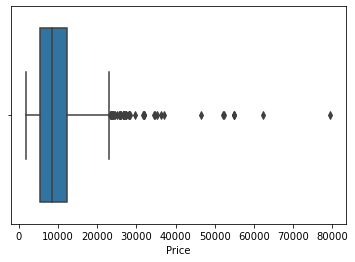

In [145]:
sns.boxplot(y_train)

In [162]:
#Finding the outliners counts
y_train[y_train > 30000].count()

18

In [161]:
#Finding the outliners values
q1 = y_train.quantile(0.25)
q3 = y_train.quantile(0.75)
iqr = q3 - q1 #Interquartile range
fence_low = q1 - (1.5*iqr)
fence_high = q3 + (1.5*iqr)
print(fence_high,fence_low)

23017.0 -5367.0


In [ ]:
Next: https://www.kaggle.com/breemen/nyc-taxi-fare-data-exploration/